In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose 

In [32]:
data=pd.read_csv('https://raw.githubusercontent.com/Aya123-sys/CVIP-data_science/main/phase_1/Golden_task/dataset_tk.csv')
data.rename(columns={"Unnamed: 0":"Date"},inplace=True)
data.head()

,Date,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,02/01/2019 00:00:00,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,03/01/2019 00:00:00,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,04/01/2019 00:00:00,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,05/01/2019 00:00:00,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,06/01/2019 00:00:00,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3


In [3]:
data1=data
data1['Date']=pd.to_datetime(data1["Date"],dayfirst=True)
data1["year"]=data1["Date"].dt.year
data1["month"]=data1["Date"].dt.month
data1["day"]=data1["Date"].dt.day
new_order = ["day","month" , "year","Punjab","Haryana","Rajasthan","Delhi","UP","Uttarakhand","HP","J&K","Chandigarh","Chhattisgarh","Gujarat","MP","Maharashtra","Goa","DNH","Andhra Pradesh","Telangana","Karnataka","Kerala","Tamil Nadu","Pondy","Bihar","Jharkhand","Odisha","West Bengal","Sikkim","Arunachal Pradesh","Assam","Manipur","Meghalaya","Mizoram","Nagaland","Tripura"	]
data1=data1[new_order]
data1.head()

,day,month,year,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,2,1,2019,119.9,130.3,234.1,85.8,313.9,40.7,30.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,3,1,2019,121.9,133.5,240.2,85.5,311.8,39.3,30.1,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,4,1,2019,118.8,128.2,239.8,83.5,320.7,38.1,30.1,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,5,1,2019,121.0,127.5,239.1,79.2,299.0,39.2,30.2,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,6,1,2019,121.4,132.6,240.4,76.6,286.8,39.2,31.0,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   day                503 non-null    int32  
 1   month              503 non-null    int32  
 2   year               503 non-null    int32  
 3   Punjab             503 non-null    float64
 4   Haryana            503 non-null    float64
 5   Rajasthan          503 non-null    float64
 6   Delhi              503 non-null    float64
 7   UP                 503 non-null    float64
 8   Uttarakhand        503 non-null    float64
 9   HP                 503 non-null    float64
 10  J&K                503 non-null    float64
 11  Chandigarh         503 non-null    float64
 12  Chhattisgarh       503 non-null    float64
 13  Gujarat            503 non-null    float64
 14  MP                 503 non-null    float64
 15  Maharashtra        503 non-null    float64
 16  Goa                503 non

In [5]:
data1.shape

(503, 36)

In [6]:
print('the number of null value per column is ',data.isnull().sum())

the number of null value per column is  Date                 0
Punjab               0
Haryana              0
Rajasthan            0
Delhi                0
UP                   0
Uttarakhand          0
HP                   0
J&K                  0
Chandigarh           0
Chhattisgarh         0
Gujarat              0
MP                   0
Maharashtra          0
Goa                  0
DNH                  0
Andhra Pradesh       0
Telangana            0
Karnataka            0
Kerala               0
Tamil Nadu           0
Pondy                0
Bihar                0
Jharkhand            0
Odisha               0
West Bengal          0
Sikkim               0
Arunachal Pradesh    0
Assam                0
Manipur              0
Meghalaya            0
Mizoram              0
Nagaland             0
Tripura              0
year                 0
month                0
day                  0
dtype: int64


In [7]:
print('the number of duplicated data in the transction dataset is :',data1.duplicated().sum())

the number of duplicated data in the transction dataset is : 0


In [8]:
data.iloc[:,1:35].describe()


,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,...,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura,year
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,...,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,141.145527,138.333598,218.443340,83.380716,314.036382,36.157058,26.568191,44.264016,4.141551,83.877137,...,138.708151,1.289463,2.109145,24.960040,2.494632,5.643738,1.706362,2.162425,4.085487,2019.286282
std,56.977361,38.106593,27.421615,25.915357,66.516960,6.705108,4.807040,4.769391,1.143422,10.130427,...,27.849180,0.363565,0.231132,4.732684,0.223141,0.717257,0.144760,0.145174,0.751047,0.452473
min,56.100000,64.800000,105.800000,41.800000,186.800000,16.800000,11.800000,17.800000,2.200000,37.200000,...,51.500000,0.300000,1.100000,12.200000,1.500000,3.300000,1.200000,1.400000,1.400000,2019.000000
25%,104.000000,114.800000,205.800000,63.500000,263.650000,33.800000,25.600000,41.550000,3.300000,75.700000,...,114.650000,1.100000,2.000000,22.100000,2.400000,5.300000,1.600000,2.100000,3.500000,2019.000000
50%,118.300000,126.800000,222.900000,72.700000,290.000000,37.000000,28.000000,44.100000,3.800000,82.600000,...,131.200000,1.200000,2.200000,23.500000,2.500000,5.800000,1.700000,2.200000,3.900000,2019.000000
75%,162.500000,158.100000,237.600000,105.800000,370.550000,40.350000,29.700000,47.350000,4.900000,91.600000,...,164.750000,1.400000,2.200000,27.600000,2.600000,6.100000,1.800000,2.200000,4.600000,2020.000000
max,300.000000,237.200000,278.000000,147.100000,471.800000,53.200000,34.000000,54.200000,7.400000,111.600000,...,198.500000,2.800000,2.700000,38.000000,3.200000,6.900000,2.200000,2.700000,6.600000,2020.000000


In [10]:
data2=pd.read_csv("https://raw.githubusercontent.com/Aya123-sys/CVIP-data_science/main/phase_1/Golden_task/long_data_.csv")
data2.head()

,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9
1,Haryana,NR,28.450006,77.019991,02/01/2019 00:00:00,130.3
2,Rajasthan,NR,26.449999,74.639981,02/01/2019 00:00:00,234.1
3,Delhi,NR,28.669993,77.230004,02/01/2019 00:00:00,85.8
4,UP,NR,27.599981,78.050006,02/01/2019 00:00:00,313.9


In [23]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16599 entries, 0 to 16598
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   States     16599 non-null  object 
 1   Regions    16599 non-null  object 
 2   latitude   16599 non-null  float64
 3   longitude  16599 non-null  float64
 4   Dates      16599 non-null  object 
 5   Usage      16599 non-null  float64
dtypes: float64(3), object(3)
memory usage: 778.2+ KB


# usage amount per sataes from 2019 the 5th december of 2020

In [12]:
df1=data2.loc[:,['States','Usage']]
usage_per_states=df1.groupby('States').sum()
usage_per_states_sorted = usage_per_states.sort_values(by='Usage', ascending=True)
usage_per_states_sorted

,Usage
States,
Sikkim,648.6
Mizoram,858.3
Arunachal Pradesh,1060.9
Nagaland,1087.7
Manipur,1254.8
Tripura,2055.0
Chandigarh,2083.2
Meghalaya,2838.8
Pondy,3758.9


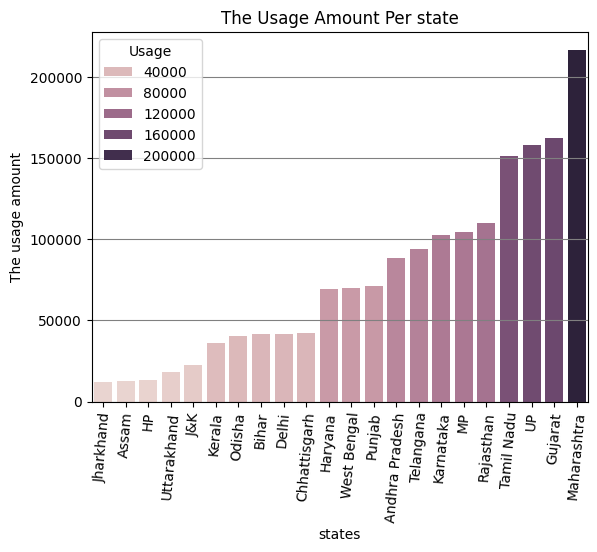

In [14]:
filtered_df = usage_per_states_sorted[usage_per_states_sorted['Usage'] > 10000]
plt.grid(axis='y',color='gray')
num_categories = len(filtered_df.index.unique())
palette = sns.color_palette('hsv', num_categories)
sns.barplot(x=filtered_df.index,y=filtered_df['Usage'],data=filtered_df,hue='Usage')
plt.xlabel('states')
plt.xticks(rotation=85)  
plt.ylabel('The usage amount')
plt.title('The Usage Amount Per state')
plt.show()

# usage amount per region from 2019 the 5th december of 2020

In [20]:
df2=data2.loc[:,['Regions','Usage']]
usage_per_region=df2.groupby('Regions').sum()
usage_per_region_sorted = usage_per_region.sort_values(by='Usage', ascending=True)
usage_per_region_sorted

,Usage
Regions,
NER,21710.4
ER,164714.5
SR,476678.6
NR,506254.6
WR,540369.8


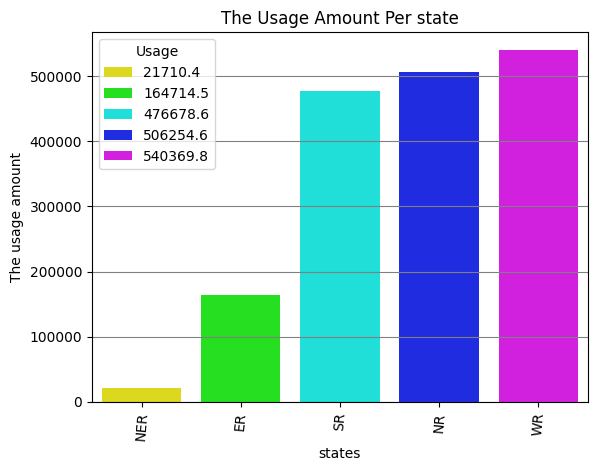

In [22]:

plt.grid(axis='y',color='gray')
num_categories = len(usage_per_region_sorted.index.unique())
palette = sns.color_palette('hsv', num_categories)
sns.barplot(x=usage_per_region_sorted.index,y=usage_per_region_sorted['Usage'],data=usage_per_region_sorted,hue='Usage',palette=palette)
plt.xlabel('states')
plt.xticks(rotation=85)  
plt.ylabel('The usage amount')
plt.title('The Usage Amount Per state')
plt.show()

# as Maharashtra state has the highest amout of consumption we will study its usage over time 


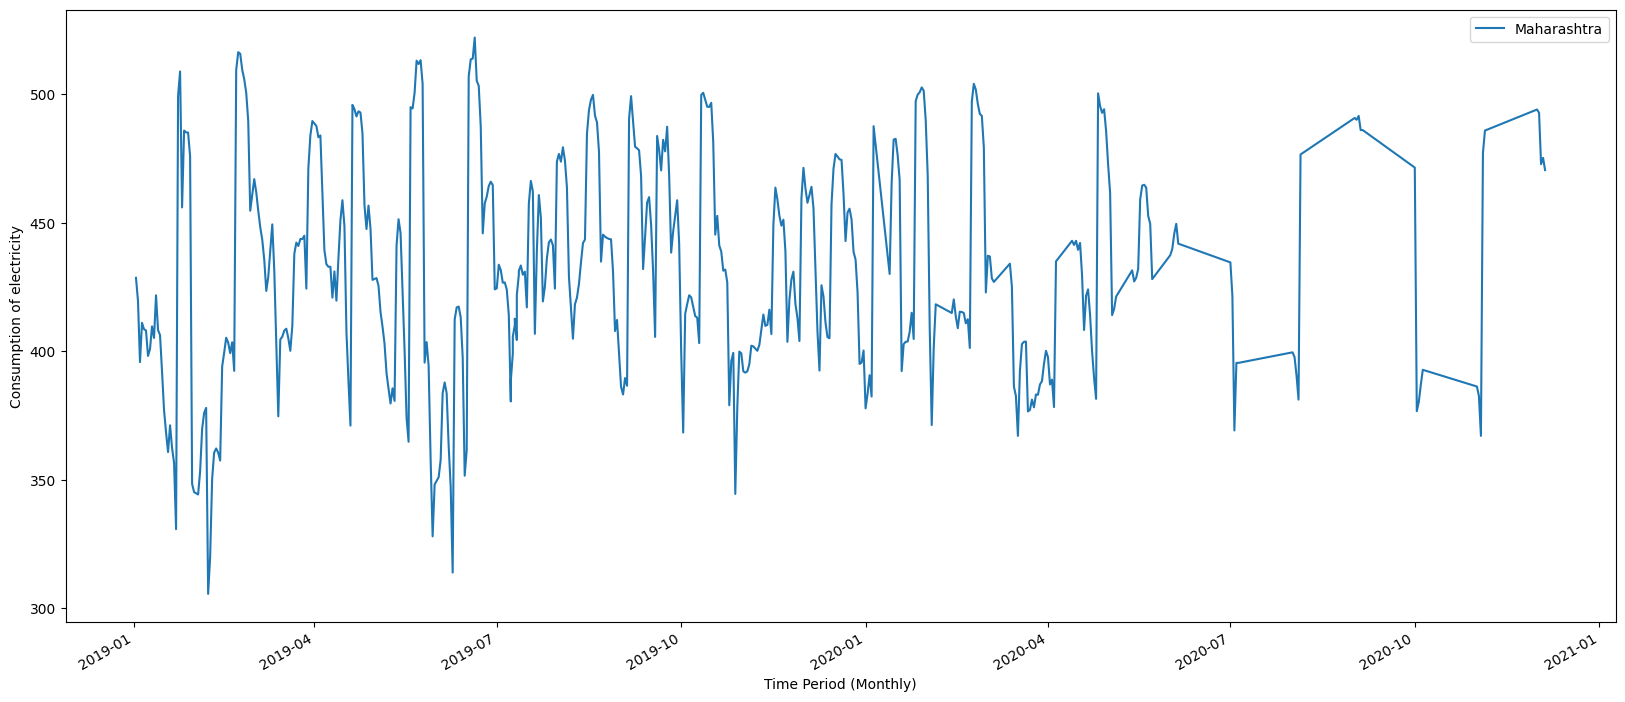

In [26]:
maharashtra=data.loc[:,['Date','Maharashtra']]
maharashtra.set_index('Date', inplace=True)
maharashtra.plot(figsize=(20,9))
plt.xlabel('Time Period (Monthly)')
plt.ylabel('Consumption of electricity')
plt.legend();

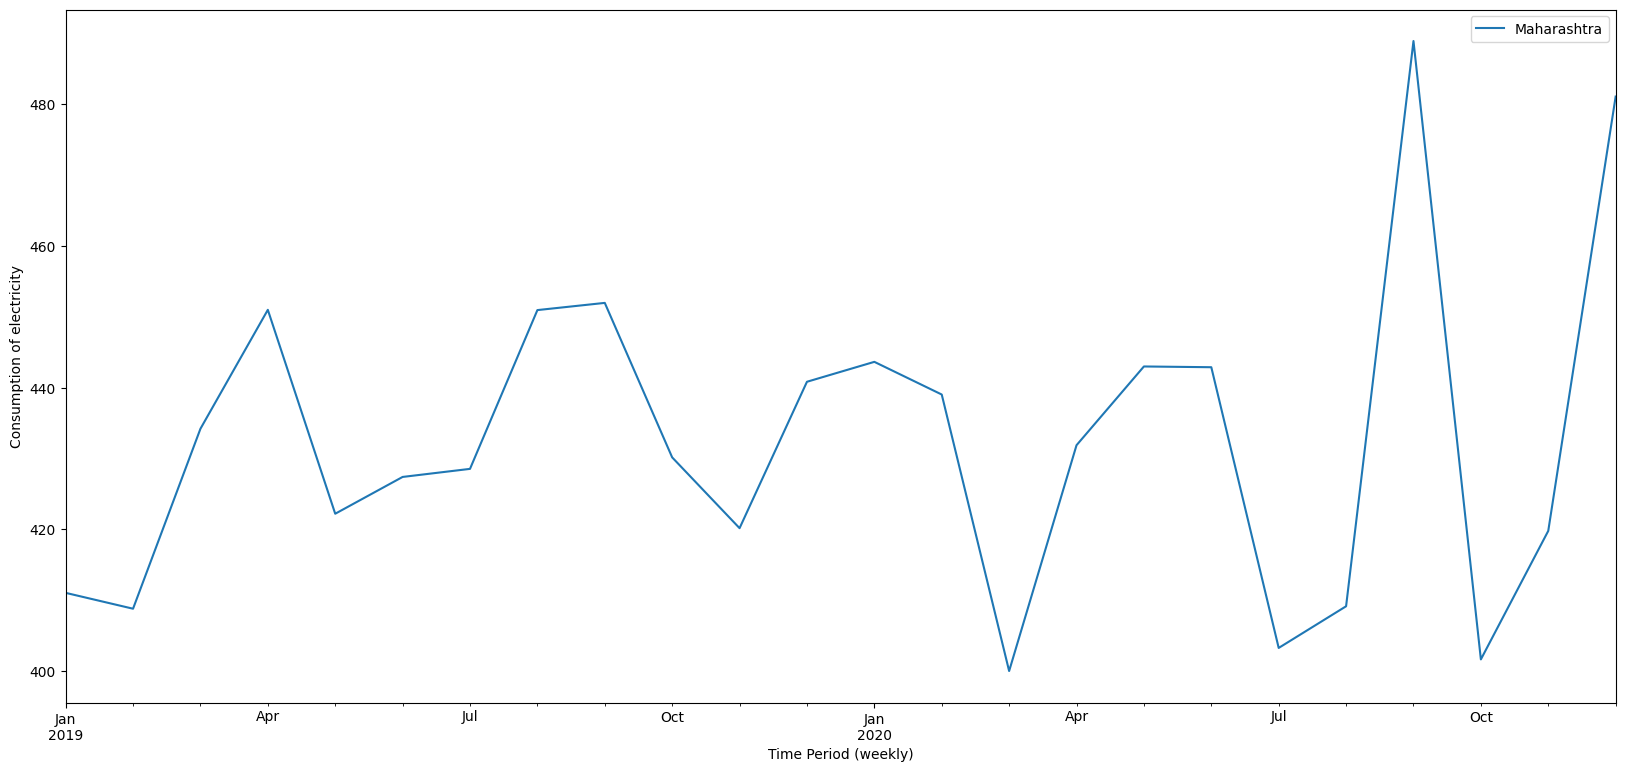

In [27]:
# because there a lot of noise to have a clear visualization we make a monthly resampling 
monthly=maharashtra.resample('M').mean()
monthly.plot(figsize=(20,9))
plt.xlabel('Time Period (weekly)')
plt.ylabel('Consumption of electricity')
plt.legend();

In [28]:
monthly 


,Maharashtra
Date,
2019-01-31,411.053333
2019-02-28,408.814815
2019-03-31,434.213333
2019-04-30,451.000000
2019-05-31,422.220000
2019-06-30,427.413793
2019-07-31,428.552778
2019-08-31,450.963333
2019-09-30,451.979310


In [50]:
decom=seasonal_decompose(monthly,period=4)
trend_analysis=decom.trend
seasonlity_analysis=decom.seasonal

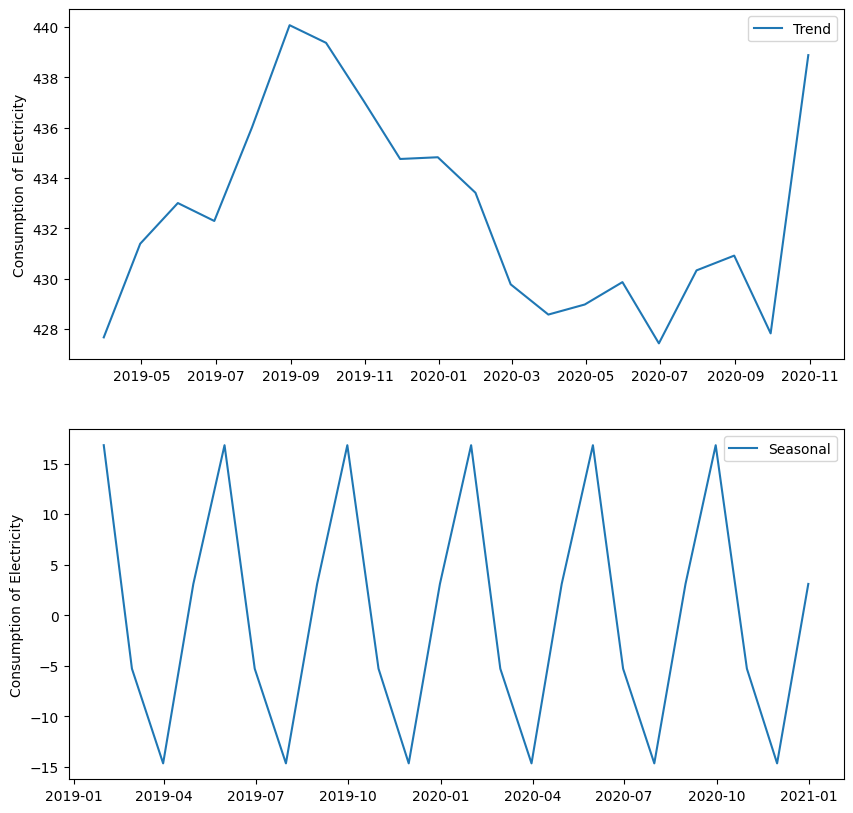

In [51]:
fig,ax=plt.subplots(2,1,figsize=(10,10))
ax[0].plot(trend_analysis,label='Trend')
ax[0].set_ylabel('Consumption of Electricity')
ax[0].legend(loc='best')
ax[1].plot(seasonlity_analysis,label='Seasonal')
ax[1].set_ylabel('Consumption of Electricity')
ax[1].legend(loc='upper right')
